In [1]:
import numpy as np
import pandas as pd
import preprocessor as p
import matplotlib.pyplot as plt

import re
import string

%matplotlib inline

In [7]:
def try_extract(d,field):
    try:
        return d[field]
    except Exception:
        return None
    
def extract_name(d):
    if d[3] != None:
        return d[3]['full_name']
    else:
        return None
    
def extract_centroid(d):
    if d[3] != None:
        return np.array(d[3]['bounding_box']['coordinates']).mean(axis=1)
    else:
        return None
    
regex = re.compile('[\.\t\,\:;\(\)\.\?\*\%\'\!\+\"]')

def make_df(ind,chunk):
    
    fname = '../data/interim/df3_{}.csv'.format(ind)
    coords = [extract_centroid(d) for d in chunk]
    place_names = [extract_name(d) for d in chunk]
    tweets = [d[0] for d in chunk]
    dates = [pd.to_datetime(int(d[1])*1000000) if d[1] != None else None for d in chunk]
    
    chunk = {'coords':coords,'place_names':place_names,'tweets':tweets,'dates':dates}
    
    df = pd.DataFrame(chunk)
    df = df.dropna(subset=['tweets'])
    df = df.drop_duplicates(subset=['tweets'])
    df = df.fillna(value=np.nan)
    df['long'] = df.iloc[:,0].map(lambda x : x[0][0],na_action='ignore')
    df['lat'] = df.iloc[:,0].map(lambda x : x[0][1],na_action='ignore')
    df = df.drop('coords',axis=1)
    df.tweets = df.tweets.map(lambda x : x.encode('utf-8').strip())
    df['clean_tweets'] = df.tweets.map(p.clean)
    df['clean_tweets'] = df.clean_tweets.map(lambda x : regex.sub('',x).lower())
    df = df.reset_index()
    
    df.clean_tweets.to_csv('clean_tweets.csv',encoding='utf-8',index=False)
    df.tweets.to_csv('tweets.csv',encoding='utf-8',index=False)
    
    !curl --data-binary @clean_tweets.csv "http://www.sentiment140.com/api/bulkClassify" > res.csv
    pols = pd.read_csv('res.csv',header=None)
    df['polarity_cl'] = pols[0]
    
    !curl --data-binary @tweets.csv "http://www.sentiment140.com/api/bulkClassify" > res.csv
    pols = pd.read_csv('res.csv',header=None)
    df['polarity'] = pols[0]
    
    df.to_csv(fname)
    
    return df

f = open('../data/raw/debate3.txt')

data = []
for line in f:
    if line != '\n':
        data.append(line)

N = len(data)
Num_chunks = N / 10000

fields = ['text','timestamp_ms','geo','place','lang']

ds = (eval(d) for d in data[1:])
data = ([try_extract(d,f) for f in fields] for d in ds)
data = (d for d in data if d[-1] == 'en')

# dfs = []
# for k in range(Num_chunks):
#     chunk = []
#     for i in range(10000):
#         try:
#             chunk.append(next(data))
#         except:
#             break
#     try:
#         dfs.append(make_df(k,chunk))
#     except Exception:
#         pass

In [19]:
z = list(data)

KeyboardInterrupt: 

In [20]:
chunk

[]

In [7]:
df = pd.read_json('debate.json')
df = df.reset_index()
df = df.drop('level_0',axis=1)

In [8]:
df.columns

Index([u'clean_tweets', u'dates', u'hour', u'index', u'lat', u'long', u'min',
       u'place_names', u'polarity', u'polarity_cl', u'tweets'],
      dtype='object')

In [134]:
df = pd.concat(dfs)
df = df.drop('index',axis=1)
df['hour'] = df.dates.map(lambda x : x.hour)
df['min'] = df.dates.map(lambda x : x.minute)
df = df.reset_index()

ValueError: No objects to concatenate

In [5]:
df[df.polarity != df.polarity_cl]

,dates,place_names,tweets,long,lat,clean_tweets,polarity_cl,polarity,hour,min
4,2016-10-10 01:04:44.841,NaN,Trump called Bill's accusers 'losers' in 1998 ...,NaN,NaN,trump called bills accusers losers in and said...,0,2,1,4
5,2016-10-10 01:04:44.999,NaN,"RT @jbarro: ""Good evening."" The very first wor...",NaN,NaN,good evening the very first words of the deba...,4,2,1,4
6,2016-10-10 01:04:45.031,NaN,RT @ElieNYC: If Bill Clinton victimized those ...,NaN,NaN,if bill clinton victimized those women donald...,2,4,1,4
8,2016-10-10 01:04:45.030,NaN,RT @richardhine: Trump: Don't judge me on the ...,NaN,NaN,trump dont judge me on the man i was years ag...,2,4,1,4
11,2016-10-10 01:04:44.951,"Alabama, USA",Appalling to me how media is playing this deba...,-86.680737,32.576227,appalling to me how media is playing this deba...,2,4,1,4
14,2016-10-10 01:04:45.106,NaN,RT @RealJizzJohnson: When you log on to twitte...,NaN,NaN,when you log on to twitter and you realize th...,2,4,1,4
16,2016-10-10 01:04:45.140,NaN,Have my son in headphones watching iPad while ...,NaN,NaN,have my son in headphones watching ipad while ...,2,4,1,4
17,2016-10-10 01:04:45.029,NaN,Welcome to the funhouse. #debate,NaN,NaN,welcome to the funhouse,2,4,1,4
23,2016-10-10 01:04:45.147,NaN,Sorry but Trumps sons look like pedophiles...s...,NaN,NaN,sorry but trumps sons look like pedophilesscar...,0,2,1,4
24,2016-10-10 01:04:45.060,NaN,RT @ABC: Clinton accusers who appeared at Trum...,NaN,NaN,clinton accusers who appeared at trump press ...,2,0,1,4


In [126]:
polarity_groups = df.groupby(['hour','min'])['polarity'].value_counts().unstack()

In [127]:
rng = pd.date_range('2016-09-10 21:00:00', periods=97, freq='min')
polarity_groups['time'] = rng
polarity_groups = polarity_groups.set_index('time')
polarity_groups.columns = ['negative','neutral','positive']

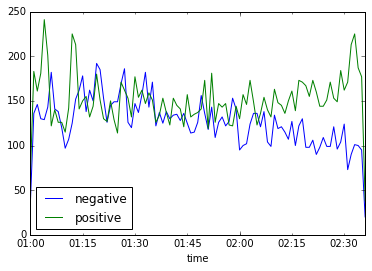

In [104]:
polarity_groups[['negative','positive']].plot()

In [29]:
polarity_groups.columns = ['negative','neutral','positive']

In [30]:
polarity_groups.sort_values('negative',ascending=False)

,negative,neutral,positive
time,,,
2011-01-01 01:19:00,192,1967,180
2011-01-01 01:27:00,186,1721,162
2011-01-01 01:20:00,185,1885,151
2011-01-01 01:06:00,182,1998,122
2011-01-01 01:33:00,182,1547,147
2011-01-01 01:15:00,178,1967,150
2011-01-01 01:35:00,171,1591,151
2011-01-01 01:26:00,169,1883,171
2011-01-01 01:14:00,162,1800,141


In [31]:
polarity_groups.sort_values('positive',ascending=False)

,negative,neutral,positive
time,,,
2011-01-01 01:04:00,129,1799,241
2011-01-01 01:12:00,125,1886,225
2011-01-01 02:33:00,101,1811,225
2011-01-01 01:13:00,152,1743,213
2011-01-01 02:32:00,90,1689,213
2011-01-01 01:05:00,143,1834,201
2011-01-01 02:34:00,100,1640,187
2011-01-01 02:29:00,104,1704,184
2011-01-01 01:01:00,136,1939,183


In [24]:
df[(df.hour == 1) & (df['min'] == 23) & (df.polarity == 0)]['tweets'].sample(frac=0.1).tolist()

[u'PLEASE SAY IT. #debate',
 u'Is this real life??  #debate',
 u'RT @chick_in_kiev: When a reality TV star wandered in to your presidential debate. #debate https://t.co/Z0OoUgmHCC',
 u'Did he really just threaten her? #debate',
 u"RT @scullymike: All pussy-grabbing, handicap-mocking, and racism aside, let's not forget that Trump was never qualified to be President.",
 u'YO TRUMP IS SO PATHETIC \U0001f602\U0001f602\U0001f602\U0001f602\U0001f602\U0001f602\U0001f602\U0001f602\U0001f602\U0001f602\U0001f602\U0001f602\U0001f602\U0001f602\U0001f602',
 u'the debate has only been going on for 23 minutes and it is 200x messier than last time',
 u'RT @krystalball: Say it with me. Bill Clinton is not on the ballot. #debate',
 u'I think he might physically attack her. #DumpSniffles #debate',
 u'Did @realDonaldTrump just call @HillaryClinton the devil? Speechless #ImWithHer #debate',
 u'RT @tonyschwartz: Done: there will be no contrition, no humility, no apology. Trump has gone completely off the ra

In [34]:
df[(df.hour == 1) & (df['min'] == 8) & (df.polarity == 4)]['tweets'].sample(frac=0.1).tolist()

[u"It's okay, Hillary, I wouldn't touch his hand either. #debate",
 u'RT @JonahNRO: They should have a debate format where the candidates eat an antelope with their hands around a fire.',
 u'Trump agrees with Hillary.  Point HRC #Trump #Election2016 #Debate',
 u'Trump looks like a scolded boy on that chain behind HRC. #debates #GoldRush #LetGaryDebate',
 u"RT @maureenjohnson: You guys, let's always remember what it was like now, before the #debate started.",
 u'RT @heyrevelist: Over 1 million women are tweeting about their sexual assaults, thanks to @realDonaldTrump #debate\u2026',
 u'OMG @HillaryClinton is already lying. Go figure. This is going to be horrible. #debate',
 u'RT @TheRealKLawson: Getting ready to watch the show \n"The Great American Train Wreck"\n\nAka the 2016 Presidential #debate https://t.co/cLGyx\u2026',
 u'RT @K1erry: Lol. Hillary talking about being positive. Omg  #debate',
 u'RT @GREATKIMBINO: The debate should be on Comedy Central https://t.co/WrpK1f4U6H',
 u'RT 

In [35]:
df[(df.hour == 1) & (df['min'] == 12) & (df.polarity == 4)]['tweets'].sample(frac=0.1).tolist()

[u"RT @KCRADana: We're at @RegalMovies in #Natomas to watch the #Debate... Tickets are #free at all 4 theaters. @kcranews https://t.co/akxTSBE\u2026",
 u'Trump keeps changing the topic LOL',
 u'RT @AdaoraUdoji: Anderson Cooper went there.  Trump defending his atrocious language about sexual abuse as locker talk and then talk about\u2026',
 u'RT @Cheesemeister3k: Trump hides behind a weak apology, quickly changes subject to ISIS. WTF?',
 u'Who is going to make America safe from you? #debate',
 u'???? ISIS as nothing to do with "locker room talk"?  #debate',
 u'"hey trump why did you brag about sexually assaulting women" "UHH ISIS"',
 u'Pho-ck Trump https://t.co/FC2z9ZP2dl',
 u'RT @troyjfreed: WHAT IS TRUMP TALKING ABOUT',
 u'RT @ChrisWarcraft: What does Isis have to do with Trump sexually assaulting women?',
 u'Trump quickly changes the topic to Isis when asked on sexual assault. No surprise there. #answerthequestion #presidentialdebate2016',
 u'"Women have respect for me." - Trump. WHA

# trump responds to sexual assult alegatons

- v. strange pivot to ISIS

No, I didn't say that at all. I don't think you understood what was -- this was locker room talk. I'm not proud of it. I apologize to my family. I apologize to the American people. Certainly I'm not proud of it. But this is locker room talk. You know, when we have a world where you have ISIS chopping off heads, where you have -- and, frankly, drowning people in steel cages, where you have wars and horrible, horrible sights all over, where you have so many bad things happening, this is like medieval times. We haven't seen anything like this, the carnage all over the world. And they look and they see. Can you imagine the people that are, frankly, doing so well against us with ISIS? And they look at our country and they see what's going on. Yes, I'm very embarrassed by it. I hate it. But it's locker room talk, and it's one of those things. I will knock the hell out of ISIS. We're going to defeat ISIS. ISIS happened a number of years ago in a vacuum that was left because of bad judgment. And I will tell you, I will take care of ISIS.

- some good tweets

Yeah, I brag about sexually assaulting women, but ISIS beheads people, so I'm more presidential than them! #debate #lockerroomtalk

Trump is gonna grab ISIS by the pussy

hey trump why did you brag about sexually assaulting women" "UHH ISIS"

What's ISIS got to do, got to do, got to do with it? #Debate

Trump hides behind a weak apology, quickly changes subject to ISIS. WTF?

In [40]:
df[(df.hour == 2) & (df['min'] == 33) & (df.polarity == 2)]['tweets'].sample(frac=0.01).tolist()

[u'RT @poczaps: me @ trump\n#debates https://t.co/NXCtbW3hAo',
 u'RT @michellekariuki: Done finished all my liq on this debate',
 u"RT @pattonoswalt: GODDAMIT START I CAN'T STAND THIS.. #debate",
 u'RT @RightWingWatch: Donald Trump once again denies saying the thing he said\nhttps://t.co/cdkvl4wUxP',
 u'RT @DylanByers: New from @twitter: "This is now the most Tweeted debate ever."',
 u"RT @ParisHilton: In honor of tonight's #Debate. Here's the time I hosted #SNL &amp; played #DonaldTrump's wife. https://t.co/LaOZCJuSg9",
 u'RT @Cernovich: Sick Hillary had no zingers, relied on debate moderators from hoaxing media to interrupt Trump, caught in several of #Hillar\u2026',
 u"Anyone that votes for trump votes for an incomplete way to vote. They don't know where to vote. Rednecks just fly flags. T it #Debates2016",
 u"To be fair, I'm watching Professional Wrestling instead of the debate.",
 u"@CNNPolitics Why isn't Trump ANSWERING THE QUESTIONS????????????????",
 u'RT @nowayitsray: Trump yo

In [41]:
z = polarity_groups[['negative','positive']]

In [43]:
z.corr()

,negative,positive
negative,1.000000,0.207658
positive,0.207658,1.000000


In [45]:
from statsmodels.tsa.stattools import ccf

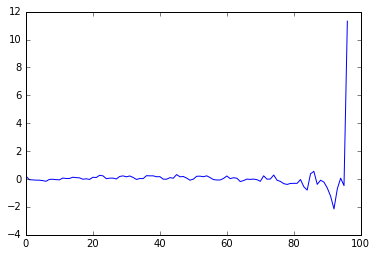

In [48]:
plt.plot(ccf(z['negative'],z['positive']))

In [52]:
df = df.reset_index()

In [90]:
df['america'] = df.clean_tweets.map(lambda x : 'america' in x)
df['great_again'] = df.clean_tweets.map(lambda x : 'great again' in x)
df['sniffle'] = df.clean_tweets.map(lambda x : 'sniffle' in x)
df['isis'] = df.clean_tweets.map(lambda x : 'isis' in x)

In [115]:
polarity_groups = df.groupby(['hour','min'])['sniffle'].value_counts()

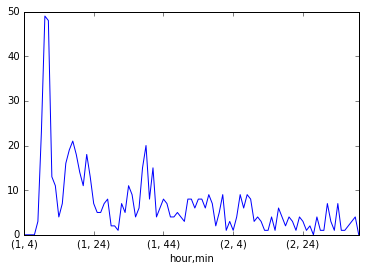

In [116]:
polarity_groups.unstack().iloc[:,1].fillna(0).plot()

In [94]:
polarity_groups.unstack().iloc[:,1].fillna(0).sort_values()

hour  min
1     4        0.0
      5        2.0
      10       2.0
      9        2.0
2     40       3.0
1     6        3.0
      7        4.0
      8        4.0
2     34      11.0
1     58      11.0
2     37      14.0
      39      14.0
      31      14.0
      32      15.0
      35      16.0
      27      16.0
      36      17.0
1     36      17.0
2     17      18.0
1     29      18.0
      30      19.0
2     21      19.0
1     57      20.0
2     38      20.0
      24      22.0
1     55      22.0
      37      22.0
2     19      23.0
1     39      24.0
2     28      24.0
             ...  
      18      41.0
1     21      44.0
      52      45.0
      27      46.0
2     7       47.0
1     42      50.0
      41      50.0
2     16      52.0
      15      52.0
1     23      55.0
      45      56.0
      20      63.0
2     13      63.0
      0       63.0
      8       64.0
1     18      66.0
2     1       68.0
      12      73.0
      9       74.0
      14      78.0
      11      80.0
1 

In [128]:
dates_epoch_ms = [int(x.strftime("%s"))*1000 for x in rng]
pos = polarity_groups.positive.as_matrix()
neg = polarity_groups.negative.as_matrix()
neu = polarity_groups.neutral.as_matrix()

In [112]:
from nvd3 import lineChart

chart = lineChart(name="myChart", x_is_date=True, date_format="%H:%M")
chart.set_graph_width(800)
chart.add_serie(y=pos, x=dates_epoch_ms, name='Positive',color='green')
chart.add_serie(y=neg, x=dates_epoch_ms, name='Negative',color='red')
chart.add_serie(y=neu, x=dates_epoch_ms, name='Neutral',color='blue')

In [130]:
chart.buildhtml()

In [131]:
f = open('test.html','wb')
f.write(chart.htmlcontent)
f.close()

In [117]:
sniffles = polarity_groups.unstack().iloc[:,1].fillna(0).as_matrix()

In [129]:
chart = lineChart(name="myChart", x_is_date=True, date_format="%H:%M")
chart.set_graph_width(800)
chart.add_serie(y=sniffles, x=dates_epoch_ms, name='Sniffle Mentions',color='blue')

In [13]:
df[df.polarity == 2].tweets.tolist()

[u'RT @NPR: The NPR fact check of the second presidential #debate is live. Keep this page open: https://t.co/IIjMybivac https://t.co/P2YBm1jZmC',
 u'Coffee + debate time. Dis gon b good https://t.co/uQCKmYfgII',
 u'RT @revol_less: In case anyone thinks Trump actually cares at all about survivors of sexual assault. #Debate https://t.co/O2Ecif1EMp',
 u"RT @NolteNC: Chew on this....\n\nTrump's Lewd Audio Might Have Reset the Race to His Benefit \n\nhttps://t.co/cTEYmxzHYM",
 u'RT @OBrienMB_NY: My fellow Americans, you are about to witness a serious personality disordered person in a presidential debate. That would\u2026',
 u"RT @MikeEdBaker: So, um, GOP - did you not know the guy's certifiable? And you really didn't have anyone who could win against him?\u2026",
 u'RT @KamalaHarris: I agree, @HillaryClinton. We must lift each other up, not tear each other down. We are stronger when we work together. #I\u2026',
 u'RT @thelindsayellis: like holy shit is their entire debate strategy the clas

In [3]:
pd.DataFrame.to_csv?